# Simulate $\chi^2$

Generate 10,000 random observations that are distributed $\chi^2$ with 8 degrees of freedom. Use a fixed seed, so you get the same result in repeated runs. Plot a histogram using matplotlib. Overlay the theoretical $\chi^2$ 8 probability density function. Annotate both axes. Make the graph larger than default. Turn a grid on. Make the graph as clear and publication quality as you can.

Extra credit: make the plot interactive.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import ipywidgets as widgets

np.random.seed(6)

data = np.random.chisquare(df=8, size=10000)

x = np.linspace(min(data), max(data), 1000)
pdf = chi2.pdf(x, df=8)

def plot_hist_and_pdf(bins=50):
    
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, density=True, alpha=0.6, color='lightblue', label="Sample data")
    plt.plot(x, pdf, color='darkred', linewidth=2, label=r"$\chi^2_8$")
    
    plt.xlabel("Value")
    plt.ylabel("Probability density")
    plt.grid(True)
    plt.title(r"$\chi^2$ with 8 degrees of freedom")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

widgets.interact(plot_hist_and_pdf, bins=widgets.IntSlider(min=10, max=100, step=5, value=50, description='Bins:'));

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


interactive(children=(IntSlider(value=50, description='Bins:', min=10, step=5), Output()), _dom_classes=('widg…

# OLS with numpy

### Generate a matrix with random entries

In [2]:
import numpy as np
np.random.seed(6)
T = 5
N = 4

X = np.random.normal(0, 1, size=(T, N))

print(X)


[[-0.31178367  0.72900392  0.21782079 -0.8990918 ]
 [-2.48678065  0.91325152  1.12706373 -1.51409323]
 [ 1.63929108 -0.4298936   2.63128056  0.60182225]
 [-0.33588161  1.23773784  0.11112817  0.12915125]
 [ 0.07612761 -0.15512816  0.63422534  0.810655  ]]


### Simulate outputs

In [3]:
np.random.seed(6)
def linmodel(X, beta, sigma):

    X_beta = np.dot(X, beta)
    
    T = X.shape[0]
    
    epsilon = sigma * np.random.normal(0, sigma, size = (T, ))

    y = X_beta + epsilon

    return y

T, N = 5, 3
X = np.random.randn(T, N)
beta = np.random.randn(N)
sigma = 2.0
y = linmodel(X, beta, sigma)
print(y)

[ 2.51834131  2.79551749  1.19523161  7.30179349 -5.39229583]


### Fit a linear model to solve $\beta$

In [4]:
import numpy as np
np.random.seed(6)
class LinearRegressionNormalEquations:
    
    def __init__(self):
        self.beta = None
    
    def fit(self, X, y):

        T, N = X.shape
        if not T > N:
            raise ValueError("Number of observations T must be greater than number of features N.")

        Xt = np.transpose(X)
        XtX = np.dot(Xt, X)
        Xty = np.dot(Xt, y)
        
        if np.linalg.det(XtX) == 0:
            raise ValueError("Matrix X'X is singular and cannot be inverted.")
        
        self.beta = np.linalg.solve(XtX, Xty)
        return self.beta


### Test fit method wtih different $\sigma$

In [5]:
T = 1000
N = 3
np.random.seed(6)
beta = np.array([0.01, 0.1, 1])

for sigma in [0.01, 0.1, 1]:
    
    X = np.random.normal(0, 1, size=(T, N))
    
    y = linmodel(X, beta, sigma)
    
    model = LinearRegressionNormalEquations()
    beta_hat = model.fit(X,y)
    
    print(f"σ = {sigma}, Estimated β: {beta_hat}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
σ = 0.01, Estimated β: [0.01000683 0.10000414 1.00000011]
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
σ = 0.1, Estimated β: [0.00987107 0.10019836 1.00054164]
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
σ = 1, Estimated β: [0.01917986 0.08828356 0.97273915]


$\text{As a function of the sample noise, I observed that as sample noise σ increases, the estimator tends to deviate more from the true β, i.e., it gets noisier.}$  

$\text{It makes sense since a larger σ generates a larger error term, resulting in more variability in }$$y,$ $\text{which makes it harder to fit the model.}$

### Standard Deviation of $\beta(\sigma)$

In [6]:
K = 100
T = 1000
N = 3

for sigma in [0.01, 0.1, 1]:
    
    beta_k = np.zeros((K, N))
    
    for k in range(K):
    
        X = np.random.normal(0, 1, size=(T, N))
    
        y = linmodel(X, beta, sigma)
    
        model = LinearRegressionNormalEquations()
        beta_k[k] = model.fit(X, y)

    std_devs = beta_k.std(axis=0)

print(f"Standard Deviation for β1: {std_devs[0]}")
print(f"Standard Deviation for β2: {std_devs[1]}")
print(f"Standard Deviation for β3: {std_devs[2]}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Scatter plot of $y$ and $\hat{y}$

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


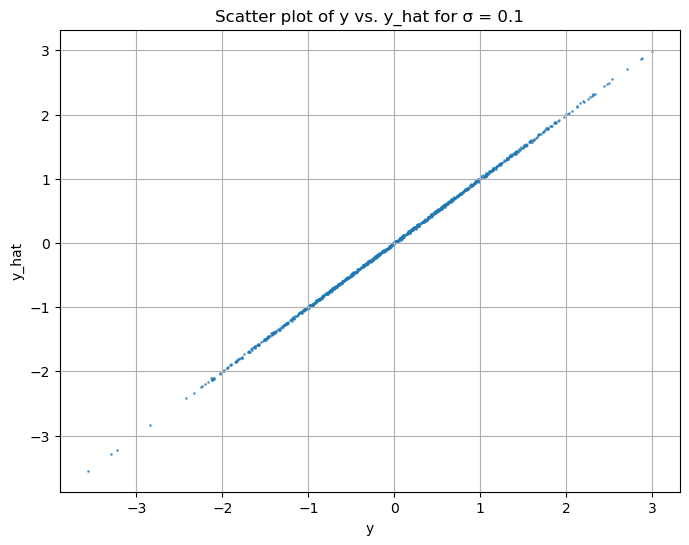

In [7]:
import numpy as np
import matplotlib.pyplot as plt

T = 1000
N = 3
beta = np.array([0.01, 0.1, 1])
sigma = 0.1 #one can adjust sigma and replot here

X = np.random.normal(0, 1, size=(T, N))

y = linmodel(X, beta, sigma)

model = LinearRegressionNormalEquations()
beta_hat = model.fit(X, y)

y_hat = np.dot(X, beta_hat)

plt.figure(figsize=(8,6))
plt.scatter(y, y_hat, s=1, alpha=0.6)
plt.xlabel('y')
plt.ylabel('y_hat')
plt.title('Scatter plot of y vs. y_hat for σ = 0.1')
plt.grid(True)
plt.show()

### Explanation: 
$\text{The scatter plot gets closer to the function}$ $y=x$ $\text{as σ becomes smaller. This is the case at σ = 0.01 or 0.1, which means}$ $y$ $\text{and}$ $y_{hat}$ $\text{are close in their values.}$  
$\text{However, when σ grows larger, although the data points still distribute around}$ $y=x,$ $\text{there is more and more deviation from the fucntion}$ $y=x,$ $\text{which means there is a bigger difference between}$ $y$ $\text{and}$ $y_{hat}$

### Interactive version of $y(\sigma)$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

def linmodel(X, beta, sigma):
    return np.dot(X, beta) + np.random.normal(0, sigma, X.shape[0])

T = 1000
N = 3

def interactive_plot(sigma, beta1, beta2, beta3):
    true_beta = np.array([beta1, beta2, beta3])

    X = np.random.normal(0, 1, size=(T, N))

    y = linmodel(X, true_beta, sigma)

    model = LinearRegressionNormalEquations()
    beta_hat = model.fit(X, y)

    y_hat = np.dot(X, beta_hat)

    plt.figure(figsize=(8,6))
    plt.scatter(y, y_hat, s=5, alpha=0.6)
    plt.xlabel('True y')
    plt.ylabel('Estimated y_hat')
    plt.title(f'Scatter plot of y vs. y_hat for σ = {sigma} and β = [{beta1}, {beta2}, {beta3}]')
    plt.grid(True)
    plt.show()

interact(interactive_plot,
         sigma=FloatSlider(value=0.5, min=0, max=1, step=0.01, description="σ"),
         beta1=FloatSlider(value=0.5, min=0, max=1, step=0.01, description="β1"),
         beta2=FloatSlider(value=0.5, min=0, max=1, step=0.01, description="β2"),
         beta3=FloatSlider(value=0.5, min=0, max=1, step=0.01, description="β3"))


interactive(children=(FloatSlider(value=0.5, description='σ', max=1.0, step=0.01), FloatSlider(value=0.5, desc…

<function __main__.interactive_plot(sigma, beta1, beta2, beta3)>

### Prove P is a symmetric and orthogonal projection

\begin{align*}
P' &= (X(X'X)^{-1}X')' \\
&= (X')'((X'X)^{-1})'X' \\
&= X((X'X)')^{-1}X' \\
&= X(X'X)^{-1}X'\\
&= P\\
\end{align*}
$\text{Thus, P is symmetric.}$  
\begin{align*}
P^2 &= X(X'X)^{-1}X'X(X'X)^{-1}X' \\
&=  X(X'X)^{-1}IX'\\
&=  X(X'X)^{-1}X'\\
&= P\\
\end{align*}
$\text{Thus, P is idempotent and a projection matrix.}$
\begin{align*}
X'r &= X'(y-\hat{y}) \\
&= X'(y-Py) \\
&= X'y - X'X(X'X)^{-1}X'y \\
&= X'y - X'y\\ 
&= 0\\
\end{align*}

$\text{Since the residual }$$y-\hat{y}$ $\text{is orthogonal to the column space of }$$X,$ $\text{we showed that P is a symmetric and orthogonal projection from}$ $\mathbb{R}_n \rightarrow R(X)$

### Can $R^2$ be negative?

$\text{When the classical linear regression model is evaluated on the train data (i.e. the data on which it is fitted), the}$ $R^2$ $\text{never drops below zero since it minimizes the squared error.}$  
$$ R^2 = 1 - \frac{SSR}{SST} $$

$\text{The worst case of prediction is predicting the mean value of}$ $y$ $\text{for all}$ $X$, $\text{which results in}$ $SSR=SST$ $\text{and that}$ $R^2=0$. 

$\text{However, as pointed out in the textbook, if the regressors do not include a constant but (as some regression software packages do) we nevertheless calculate R2 by the formula (1.2.18), then the}$ $R2$ $\text{can be negative.}$

$\text{train data}$  
$y_1 = [3,2,1]$  
$X_1 = [1,2,3]$  
$\text{Regression curve:}$ $y = 4 - x$  

$\text{Evaluate the model on new test data}$  
$y_2 = [1,2,3]$  
$X_2 = [1,2,3]$
$$R^2 = 1 - \frac{SS_{res}}{SS_{total}} = 1 - \frac{8}{2} = -3$$  

$\text{In this case, the}$ $R^2$ $\text{becomes negative because the model is worse than simply predicting the mean of}$ $y.$ 

### Prove $\nabla_\beta \beta' A \beta = 2A\beta$

$\text{We write a sample version of the matrix multiplication}.$  
$$ f(\beta) = \beta' A \beta = \sum_{i=1}^{n} \sum_{j=1}^{n} A_{ij} \beta_i \beta_j $$

$$ \frac{\partial f}{\partial \beta_k} = \frac{\partial}{\partial \beta_k} \sum_{i=1}^{n} \sum_{j=1}^{n} A_{ij} \beta_i \beta_j $$

$\text{For terms where neither}$ $i$ $\text{nor}$ $j$ $\text{equals}$ $k$, $\text{the derivative will be zero.}$ 

$\text{When}$ $i = k$ $\text{and}$ $j \neq k:$ 
$$ \frac{\partial}{\partial \beta_k} (A_{kj} \beta_k \beta_j) = A_{kj} \beta_j $$

$\text{When}$ $i\neq k$ $\text{and}$ $j = k:$  

$$\frac{\partial}{\partial \beta_k} (A_{ik} \beta_i \beta_k) = A_{ik} \beta_i = A_{ki} \beta_i $$

$\text{Therefore, we have:}$

$$\frac{\partial f}{\partial \beta_k} = \sum_{j=1}^{n} A_{kj} \beta_j + \sum_{i=1}^{n}A_{ki} \beta_i = 2\sum_{\ell=1}^{n}A_{k\ell} \beta_\ell $$

$\text{Rewrite the sample form into the vector form, we get the result}$  
$$ \nabla_\beta \beta' A \beta = \begin{bmatrix} \frac{\partial f}{\partial \beta_1} \\ \frac{\partial f}{\partial \beta_2} \\ \vdots \\ \frac{\partial f}{\partial \beta_n} \end{bmatrix} = 2A\beta.$$

### Fixed and random regressors.

**Fixed Regressors:**

Fixed regressors are considered to be non-random in repeated samples. That is, if we were to repeatedly sample the population, the values of the fixed regressors would remain unchanged in each sample.

We often assume that the values of fixed regressors are set by the experimenter or are observed in a non-random fashion. 

The assumption of fixed regressors simplifies many calculations and results in linear regression, as we only have to consider the randomness in the error terms.

Fixed regressor models are typically used in experimental settings or when one wants to make conditional predictions, i.e., predicting $Y$ given specific values of $X$.

$$ 𝐸(𝑦_𝑖)=𝑏𝐸(𝑥_𝑖)+𝐸(𝑢_𝑖)⟹𝐸(𝑦_𝑖)=𝑏𝑥_𝑖$$

Notice that the dependent variable doesn't have an the same expected value for all $i$'s. In other words, there is not one distribution, each $𝑦_𝑖$ has its own (possibly belonging to the same family, but with different parameters).

If $X$ is fixed, then there is no need to distinguish between the conditional distribution of the error term, $f(ε_i |x_1,...,x_n)$, and the unconditional distribution, $f(ε_i)$.

**Random Regressors:**

Random regressors are considered to be random variables that can take on different values in repeated samples. When we talk about random regressors, we're considering both  $X$ and the errors $\epsilon$ as random variables.

The values of random regressors are assumed to be drawn from some underlying probability distribution. They can co-vary with the error term, but this co-variation is typically assumed to be accounted for (i.e., we might assume $E[X \epsilon] = 0$ or that $X$ is uncorrelated with $\epsilon$).

The randomness in both the regressors and the errors makes the mathematics and assumptions of linear regression more complex. For instance, to get unbiased and consistent estimates of regression coefficients, we often need to make stronger assumptions about the relationship between $X$ and  $\epsilon$.

## Finite-sample properties of OLS:

### Prove that $s^2$ is unbiased under OLS assumptiosn

**Assumptions**:

**Linearity**: The relationship between the dependent variable $y$ and the regressors in matrix $X$ is linear, such that $y = X\beta + \epsilon$.
   
**Independence**: The error terms $\epsilon$ are independent of each other and of the regressors.
   
**Homoscedasticity**: The variance of the error terms is constant across all levels of the independent variables. That is, $Var(\epsilon_i) = \sigma^2$ for all $i$.
   
**No Multicollinearity**: The matrix of regressors $X$ has full column rank, which implies that the columns of $X$ are linearly independent.
   
**Strict Exogeneity**: The expected value of the error term is zero, i.e., $E[\epsilon_i] = 0$ for all $i$.

**Proof**:

When $K=1$, there is a shorter proof:

We want to show that $\mathbb{E}\left(s^2\right)=\mathbb{E}\left(\frac{\sum_{i=1}^n\left(X_i-\bar{X}\right)^2}{n-1}\right)=\sigma^2$  

The sums are always summing from 1 to $n$.

$X_1, X_2,..., X_n$ are independent observations from a population with mean $\mu$ and variance $\sigma^2$
 
$$ \mathbb{E}\left(\sum\left(X_i-\bar{X}\right)^2\right)=\mathbb{E}\left(\sum X_i^2-2 \bar{X} \sum X_i+n \bar{X}^2\right)=\sum \mathbb{E}\left(X_i^2\right)-\mathbb{E}\left(n \bar{X}^2\right)=n \sigma^2+n \mu^2-\sigma^2-n \mu^2=(n-1) \sigma^2 \\
$$

So far, we have shown that $\mathbb{E}\left(\sum\left(X_i-\bar{X}\right)^2\right)=(n-1) \sigma^2$
$$
\begin{aligned}
& \mathbb{E}\left(s^2\right)=\mathbb{E}\left(\frac{\sum\left(X_i-\bar{X}\right)^2}{n-1}\right)=\frac{1}{n-1} \mathbb{E}\left(\sum\left(X_i-\bar{X}\right)^2\right) \\
& \mathbb{E}\left(s^2\right)=\frac{(n-1) \sigma^2}{n-1}=\sigma^2
\end{aligned}
$$

For the generate case with $s^2=\frac{\sum_{i=1}^n(X_i-\bar{X})^2}{n-K}$, it is the same as the proof of Proposition $1.2$ in the textbook.  

Since $s^2=\mathbf{e}^{\prime} \mathbf{e} /(n-K)$, the proof amounts to showing that $\mathrm{E}\left(\mathbf{e}^{\prime} \mathbf{e} \mid \mathbf{X}\right)=$ $(n-K) \sigma^2$. As shown in (1.2.12), $\mathbf{e}^{\prime} \mathbf{e}=\boldsymbol{\varepsilon}^{\prime} \mathbf{M} \boldsymbol{\varepsilon}$ where $\mathbf{M}$ is the annihilator. The proof consists of proving two properties: (1) $\mathrm{E}\left(\boldsymbol{\varepsilon}^{\prime} \mathbf{M} \boldsymbol{\varepsilon} \mid \mathbf{X}\right)=\sigma^2 \cdot \operatorname{trace}(\mathbf{M})$, and (2) $\operatorname{trace}(\mathbf{M})=n-K$.

(1) Proof that $\mathrm{E}\left(\boldsymbol{\varepsilon}^{\prime} \mathbf{M} \boldsymbol{\varepsilon} \mid \mathbf{X}\right)=\sigma^2 \cdot \operatorname{trace}(\mathbf{M})$. Since $\boldsymbol{\varepsilon}^{\prime} \mathbf{M} \boldsymbol{\varepsilon}=\sum_{i=1}^n \sum_{j=1}^n m_{i j} \varepsilon_i \varepsilon_j$ (this is just writing out the quadratic form $\varepsilon^{\prime} \mathbf{M} \varepsilon$ ), we have
$$
\begin{aligned}
& \mathrm{E}\left(\boldsymbol{\varepsilon}^{\prime} \mathbf{M} \boldsymbol{\varepsilon} \mid \mathbf{X}\right)=\sum_{i=1}^n \sum_{j=1}^n m_{i j} \mathrm{E}\left(\varepsilon_i \varepsilon_j \mid \mathbf{X}\right)\\
& =\sum_{i=1}^n m_{i i} \sigma^2 \\
& =\sigma^2 \sum_{i=1}^n m_{i i} \\
& =\sigma^2 \cdot \operatorname{trace}(\mathbf{M}) \text {. } \\
&
\end{aligned}
$$
(2) Proof that trace $(\mathbf{M})=n-K$
$$
\begin{aligned}
\operatorname{trace}(\mathbf{M}) & =\operatorname{trace}\left(\mathbf{I}_n-\mathbf{P}\right)\\
& =\operatorname{trace}\left(\mathbf{I}_n\right)-\operatorname{trace}(\mathbf{P}) \\
& =n-\operatorname{trace}(\mathbf{P})
\end{aligned}
$$
and
$$
\begin{aligned}
\operatorname{trace}(\mathbf{P}) & =\operatorname{trace}\left[\mathbf{X}\left(\mathbf{X}^{\prime} \mathbf{X}\right)^{-1} \mathbf{X}^{\prime}\right] \\
& =\operatorname{trace}\left[\left(\mathbf{X}^{\prime} \mathbf{X}\right)^{-1} \mathbf{X}^{\prime} \mathbf{X}\right] \\
& =\operatorname{trace}\left(\mathbf{I}_K\right)\\
& =K
\end{aligned}
$$
So trace $(\mathbf{M})=n-K$.

Thus, the sample variance is an unbiased estimator of the population variance.

### Compute $var[\hat{\beta}|X]$

**Assumptions**:

**Linearity**: The relationship between the dependent variable $y$ and the regressors in matrix $X$ is linear, such that $y = X\beta + \epsilon$.

**Independence**: The observations are independently drawn.

**No Multicollinearity**: The matrix of regressors $X$ has full column rank, which implies that the columns of $X$ are linearly independent.

**Homoscedasticity**: The errors have constant variance and are not autocorrelated: 
$\text{Var}(\epsilon|X) = \sigma^2 I_n$
where $I_n$ is the $n \times n$ identity matrix.

**Strict Exogeneity**: The expected value of the error term, given the regressors, is zero: 
$E[\epsilon|X] = 0$

**Proof**:

First, note that $\hat{\beta}$ is given by:
$$ \hat{\beta} = (X'X)^{-1}X'y $$

Substituting in for $y$ from the linear model:
$$ \hat{\beta} = (X'X)^{-1}X'(X\beta + \epsilon) $$

Expanding:
$$ \hat{\beta} = (X'X)^{-1}X'X\beta + (X'X)^{-1}X'\epsilon $$

$$ \hat{\beta} = \beta + (X'X)^{-1}X'\epsilon $$

Now, the variance of $\hat{\beta}$ conditional on $X$ is:
$$ var[\hat{\beta}|X] = var[(X'X)^{-1}X'\epsilon|X] $$

Using the properties of variance, this becomes:
$$ var[\hat{\beta}|X] = (X'X)^{-1}X' var[\epsilon|X] X(X'X)^{-1} $$

Substituting in our assumption about the variance of the error terms, we get:

$$ var[\hat{\beta}|X] = (X'X)^{-1}X' \sigma^2 I_n X(X'X)^{-1} $$

This simplifies to:
$$ var[\hat{\beta}|X] = \sigma^2 (X'X)^{-1} $$


### Prove $\operatorname{Cov}(\hat{\beta}, r \mid X) =0$

Since $E(r \mid X)=0$ (by strict exogeneity), $E(\hat{\beta}\mid X)=\beta$ (by unbiasedness), we have

$$\operatorname{Cov}(\hat{\beta}, r \mid X) = E[(\hat{\beta}-E[\hat{\beta}])(r-E[r])'\mid X]= E\left[(\hat{\beta}-\beta) r^{\prime} \mid X\right]$$  

Rewrite $\hat{\beta}$ and $r$

$$\hat{\beta} = (X'X)^{-1}X'y = (X'X)^{-1}X'(X\beta + \epsilon) = \beta + (X'X)^{-1}X'\epsilon $$

And

$$
\begin{aligned}
r &= y - X\hat{\beta} \\
& = X\beta + \epsilon - X\beta - X(X'X)^{-1}X'\epsilon \\
& = \epsilon - X(X'X)^{-1}X'\epsilon
\end{aligned}
$$

Substituting into the first expression

$$
\begin{aligned}
\operatorname{Cov}(\hat{\beta}, r \mid X) & = E\left[(\hat{\beta}-\beta) r^{\prime} \mid X\right] \\
& = (X'X)^{-1}X'\epsilon(\epsilon - X(X'X)^{-1}X'\epsilon)'\\
& = (X'X)^{-1}X'\epsilon(\epsilon' - \epsilon'X(X'X)^{-1}X')\\
& = (X'X)^{-1}X'\sigma^2I_n(I_n-X(X'X)^{-1}X')\\
& = (X'X)^{-1}X'\sigma^2 - (X'X)^{-1}X'\sigma^2\\
& = 0
\end{aligned}
$$